all_data importance list:
                             importance
Features                               
Bwd Packet Length Std          0.246628
Flow Bytes/s                   0.178711
Total Length of Fwd Packets    0.102370
Subflow Fwd Bytes              0.093133
Init_Win_bytes_forward         0.076328
Fwd Packet Length Std          0.063893
Bwd Packets/s                  0.035004
min_seg_size_forward           0.017396
Init_Win_bytes_backward        0.013755
Fwd IAT Mean                   0.012758
Fwd IAT Min                    0.011106
Fwd Header Length              0.010084
Fwd IAT Max                    0.009977
Flow IAT Std                   0.009885
Average Packet Size            0.009210
PSH Flag Count                 0.008861
Packet Length Mean             0.007958
Max Packet Length              0.007062
Flow IAT Min                   0.006945
Bwd IAT Mean                   0.005399

Top 5 features: all_data=['Bwd Packet Length Std', 'Flow Bytes/s', 'Total Length of Fwd Packe

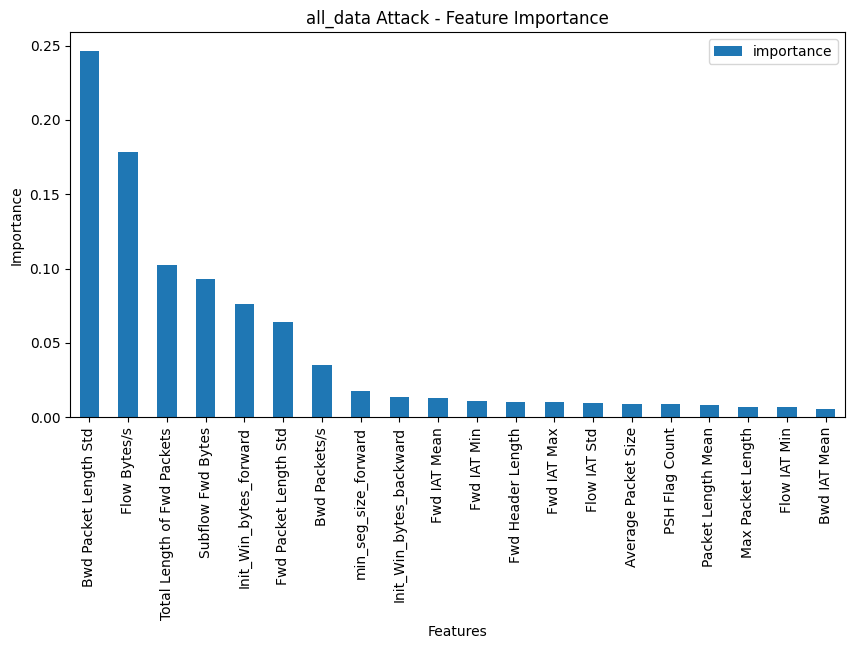

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time

# Başlangıç zamanı
seconds = time.time()

def folder(f_name):
    """Creates a folder named `f_name` in the program directory."""
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")

# CSV files names
csv_files = ["all_data.csv"]

# Headers of column
main_labels = [
    "Flow Duration", "Total Fwd Packets", "Total Backward Packets", "Total Length of Fwd Packets", "Total Length of Bwd Packets",
    "Fwd Packet Length Max", "Fwd Packet Length Min", "Fwd Packet Length Mean", "Fwd Packet Length Std", "Bwd Packet Length Max",
    "Bwd Packet Length Min", "Bwd Packet Length Mean", "Bwd Packet Length Std", "Flow Bytes/s", "Flow Packets/s",
    "Flow IAT Mean", "Flow IAT Std", "Flow IAT Max", "Flow IAT Min", "Fwd IAT Total", "Fwd IAT Mean", "Fwd IAT Std", "Fwd IAT Max",
    "Fwd IAT Min", "Bwd IAT Total", "Bwd IAT Mean", "Bwd IAT Std", "Bwd IAT Max", "Bwd IAT Min", "Fwd PSH Flags", "Bwd PSH Flags",
    "Fwd URG Flags", "Bwd URG Flags", "Fwd Header Length", "Bwd Header Length", "Fwd Packets/s", "Bwd Packets/s", "Min Packet Length",
    "Max Packet Length", "Packet Length Mean", "Packet Length Std", "Packet Length Variance", "FIN Flag Count", "SYN Flag Count",
    "RST Flag Count", "PSH Flag Count", "ACK Flag Count", "URG Flag Count", "CWE Flag Count", "ECE Flag Count", "Down/Up Ratio",
    "Average Packet Size", "Avg Fwd Segment Size", "Avg Bwd Segment Size", "Fwd Avg Bytes/Bulk", "Fwd Avg Packets/Bulk", "Fwd Avg Bulk Rate",
    "Bwd Avg Bytes/Bulk", "Bwd Avg Packets/Bulk", "Bwd Avg Bulk Rate", "Subflow Fwd Packets", "Subflow Fwd Bytes", "Subflow Bwd Packets",
    "Subflow Bwd Bytes", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "act_data_pkt_fwd", "min_seg_size_forward", "Active Mean",
    "Active Std", "Active Max", "Active Min", "Idle Mean", "Idle Std", "Idle Max", "Idle Min", "Label"
]

ths = open("importance_list_all_data.csv", "w")
folder("./feaure_pics/")

for j in csv_files:
    df = pd.read_csv(j, usecols=main_labels)
    df = df.fillna(0)

    attack_or_not = [1 if i == "BENIGN" else 0 for i in df["Label"]]
    df["Label"] = attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values

    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0

    # Computing the feature importances
    forest = RandomForestRegressor(n_estimators=250, random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    refclasscol = list(df.columns.values)

    # Creating a DataFrame for top features
    impor_bars = pd.DataFrame({
        'Features': refclasscol,
        'importance': importances
    }).sort_values('importance', ascending=False).set_index('Features')

    # Plotting the feature importance
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars[:20].plot.bar()
    plt.title(j[0:-4] + " Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig(f"./feaure_pics/{j[0:-4]}.pdf", bbox_inches='tight', format='pdf')

    # Printing and saving the top 5 features
    top_features = impor_bars.head(5).index.tolist()
    feature_list_str = j[0:-4] + "=" + str(top_features)

    print(j[0:-4], "importance list:")
    print(impor_bars.head(20))
    print("\nTop 5 features:", feature_list_str)
    print("-" * 95)

    ths.write(feature_list_str + "\n")

ths.close()
print("Mission accomplished!")
print("Total operation time: =", time.time() - seconds, "seconds")
